<a href="https://cognitiveclass.ai"><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork/images/IDSN-logo.png" width="400"> </a>

# BackPropagation

Estimated time needed: **30** mins


Backpropagation is the key algorithm used for training neural networks, allowing them to learn from data. It is based on the gradient descent optimization technique and works by iteratively adjusting the weights and biases of the network to minimize the error between the predicted and actual outputs.
 In this lab, we will create a neural network to implement backpropagation for a XOR problem.


# Objective for this notebook

* Train a Neural Network to Solve the XOR Problem
* Implement Backpropagation for Neural Network Training
* Demonstrate the Use of Activation Functions
* Understand the Learning Process Over Multiple Epochs
* Demonstrate Weight and Bias Adjustments via Gradient Descent
* Evaluate the Model's Performance After Training
* Monitor and Analyze the Training Process


<h2>Table of Contents</h2>


<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 4>
1. <a href="#Import-Required-Libraries">Import Required Libraries</a><br>
2. <a href="#Initialize-Inputs">Initialize Inputs</a><br>
3. <a href="#Declare-the-network-parameters">Declare the network parameters</a><br>
4. <a href="#Define-the-weights">Define the weights</a><br>  
5. <a href="#Training-the-Neural-Network">Training the Neural Network</a><br>  
6. <a href="#Testing-the-Network">Testing the Network</a><br>  
7. <a href="#Plot-the-error">Plot the error</a><br>  

</font>
</div>


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented. 
# If you run this notebook on a different environment, e.g., your desktop, you may need to uncomment and install certain libraries.

#!pip install numpy==1.26.4
#!pip install matplotlib==3.5.2

## Import Required Libraries


In [1]:
# Importing the required library
import numpy as np
import matplotlib.pyplot as plt

## Initialize Inputs
Define the input and expected output for a XOR gate problem


In [2]:
# Defining inputs and expected output (XOR truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 1, 1, 0])  # Expected output for XOR

# Declare the network parameters

Define the network parameters such as
1. number of input neurons
2. hidden layer neurons
3. output neurons
4. learning rate
5. number of epochs


In [3]:
# Network parameters
inputSize = 2     # Number of input neurons (x1, x2)
hiddenSize = 2    # Number of hidden neurons
outputSize = 1    # Number of output neurons
lr = 0.1          # Learning rate
epochs = 180000   # Number of training epochs

## Define the weights
Declare the weights for the neurons. The initial weights are taken as random numbers which are then optimized by the backpropagation algorithm


In [4]:
# Initialize weights and biases randomly within the range [-1, 1]
w1 = np.random.rand(hiddenSize, inputSize) * 2 - 1  # Weights from input to hidden layer
b1 = np.random.rand(hiddenSize, 1) * 2 - 1         # Bias for hidden layer
w2 = np.random.rand(outputSize, hiddenSize) * 2 - 1  # Weights from hidden to output layer
b2 = np.random.rand(outputSize, 1) * 2 - 1         # Bias for output layer

## Training the Neural Network

The neural network works in 5 stages: 
1. Forward pass
    * The input **X** is multiplied by the weights **w1** and passed through the first layer, followed by the application of the sigmoid or ReLU activation function. This gives the output for the hidden layer.
    * The output of the hidden layer is then passed through the second set of weights **w2** to compute the final output. Again, a sigmoid activation function is used to generate the final output **a2**.
    
2. Error calculation
    * The error is computed as the difference between the expected output **(d)** and the actual output **(a2)**.
3. Backward pass
    * **Output Layer**: The derivative of the sigmoid activation function is applied to the error, producing the gradient for the output layer **(da2)**. This is used to calculate how much the weights in the output layer need to be adjusted.
    * **Hidden Layer**: The error is then propagated backward to the hidden layer. The gradient at the hidden layer **(da1)** is computed by taking the dot product of the transpose of the weights **(w2.T)** and the gradient from the output layer. The derivative of the activation function (sigmoid or ReLU) is used to adjust this error.
4. Weights and bias updates
    * After computing the **gradients (dz1, dz2)**, the **weights (w1, w2)** and **biases (b1, b2)** are updated using the **learning rate (lr)** and **the gradients**. The updates are done to minimize the error and improve the model’s predictions.
5. Training:
    * This entire process is repeated over many iterations **(epochs)**. During each epoch, the model adjusts its weights and biases to reduce the error. Over time, the network learns to approximate the XOR function.
Forward Pass:



In [5]:
# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))

Epoch: 9999, Average error: 0.08370
Epoch: 19999, Average error: 0.04378
Epoch: 29999, Average error: 0.03282
Epoch: 39999, Average error: 0.02725
Epoch: 49999, Average error: 0.02376
Epoch: 59999, Average error: 0.02132
Epoch: 69999, Average error: 0.01949
Epoch: 79999, Average error: 0.01805
Epoch: 89999, Average error: 0.01689
Epoch: 99999, Average error: 0.01592
Epoch: 109999, Average error: 0.01510
Epoch: 119999, Average error: 0.01440
Epoch: 129999, Average error: 0.01378
Epoch: 139999, Average error: 0.01323
Epoch: 149999, Average error: 0.01275
Epoch: 159999, Average error: 0.01231
Epoch: 169999, Average error: 0.01191
Epoch: 179999, Average error: 0.01155


## Testing the Network
After training, you can now test the neural network to verify that it has learned the XOR function and outputs the correct values close to [0, 1, 1, 0]


In [6]:
# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('Final output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))



Final output after training: [[0.01227801 0.98937243 0.98937462 0.01268118]]
Ground truth [0 1 1 0]
Error after training: [[-0.01227805  0.0106276   0.01062541 -0.01268121]]
Average error: 0.01155


## Plot the error
Here, we plot the error as a function of epochs. This shows how error changed over multiple iterations of forward and backward passes and how the network learnt over time


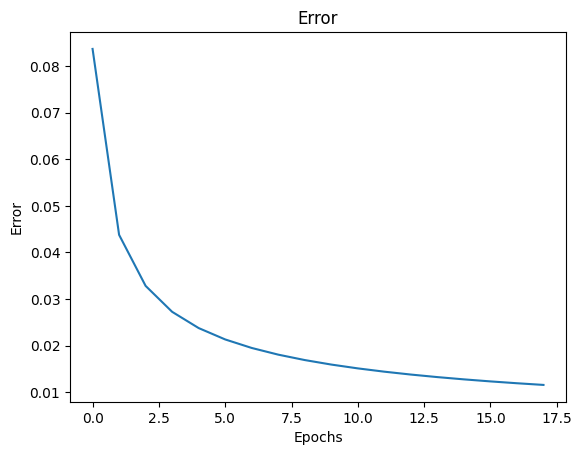

In [7]:
# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

# Practice exercise 1


Implement backpropagation for **AND problem** using similar input as used for XOR problem above and plot the error


Epoch: 9999, Average error: 0.00503
Epoch: 19999, Average error: 0.00489
Epoch: 29999, Average error: 0.00477
Epoch: 39999, Average error: 0.00465
Epoch: 49999, Average error: 0.00454
Epoch: 59999, Average error: 0.00444
Epoch: 69999, Average error: 0.00434
Epoch: 79999, Average error: 0.00425
Epoch: 89999, Average error: 0.00417
Epoch: 99999, Average error: 0.00409
Epoch: 109999, Average error: 0.00401
Epoch: 119999, Average error: 0.00394
Epoch: 129999, Average error: 0.00387
Epoch: 139999, Average error: 0.00381
Epoch: 149999, Average error: 0.00374
Epoch: 159999, Average error: 0.00368
Epoch: 169999, Average error: 0.00363
Epoch: 179999, Average error: 0.00357

Final output after training: [[7.50712939e-04 4.35337720e-03 4.26382623e-03 9.95072077e-01]]
Ground truth [0 0 0 1]
Error after training: [[-0.00075071 -0.00435338 -0.00426383  0.00492793]]
Average error: 0.00357


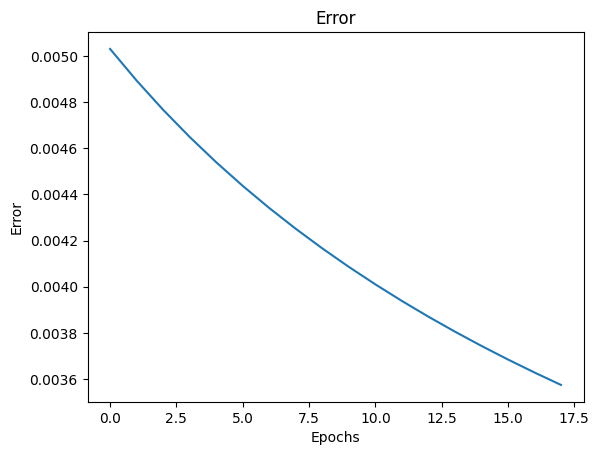

In [17]:
# Write your code here
X = np.array([
    [0,0],  # ==> 0
    [0,1],  # ==> 0
    [1,0],  # ==> 0
    [1,1]   # ==> 1
]).T
d = np.array([0,0,0,1]) # for AND

# inputSize = 2
# hiddenSize = 2
# outputSize = 1
# lr = 0.1
# epochs = 180000

# w1 = np.random.rand(hiddenSize, inputSize) * 2 - 1
# b1 = np.random.rand(hiddenSize, 1) * 2 - 1
# w2 = np.random.rand(outputSize, hiddenSize) * 2 - 1
# b2 = np.random.rand(outputSize, 1) * 2 - 1

# training
error_list = []
for epoch in range(epochs):
    z1 = np.dot(w1, X) + b1
    a1 = 1 / (1 + np.exp(-z1))

    z2 = np.dot(w2, a1) + b2
    a2 = 1 / (1 + np.exp(-z2))

    error = d - a2
    da2 = error * (a2 * (1-a2))
    dz2 = da2

    da1 = np.dot(w2.T, dz2)
    dz1 = da1 * (a1 * (1- a1))

    w2 += lr * np.dot(dz2, a1.T)
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)

    w1 += lr * np.dot(dz1, X.T)
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))


# testing
z1 = np.dot(w1, X) + b1
a1 = 1 / ( 1 + np.exp(-z1))

z2 = np.dot(w2, a1) + b2
a2 = 1 / ( 1 + np.exp(-z2))

# Print results
print('\nFinal output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))

# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()



Double-click <b>here</b> for the solution.

<!-- Your answer is below:


X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 0, 0, 1])  # Expected output for AND

# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))


# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('\nFinal output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))

# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()


-->


# Practice exercise 2


Now, decrease the learning rate to 0.01 and increase the number of epochs to 1000000 and check the error for XOR gate


Epoch: 9999, Average error: 0.00796
Epoch: 19999, Average error: 0.00793
Epoch: 29999, Average error: 0.00791
Epoch: 39999, Average error: 0.00788
Epoch: 49999, Average error: 0.00785
Epoch: 59999, Average error: 0.00783
Epoch: 69999, Average error: 0.00780
Epoch: 79999, Average error: 0.00778
Epoch: 89999, Average error: 0.00775
Epoch: 99999, Average error: 0.00773
Epoch: 109999, Average error: 0.00770
Epoch: 119999, Average error: 0.00768
Epoch: 129999, Average error: 0.00766
Epoch: 139999, Average error: 0.00763
Epoch: 149999, Average error: 0.00761
Epoch: 159999, Average error: 0.00759
Epoch: 169999, Average error: 0.00756
Epoch: 179999, Average error: 0.00754
Epoch: 189999, Average error: 0.00752
Epoch: 199999, Average error: 0.00749
Epoch: 209999, Average error: 0.00747
Epoch: 219999, Average error: 0.00745
Epoch: 229999, Average error: 0.00743
Epoch: 239999, Average error: 0.00741
Epoch: 249999, Average error: 0.00739
Epoch: 259999, Average error: 0.00736
Epoch: 269999, Average 

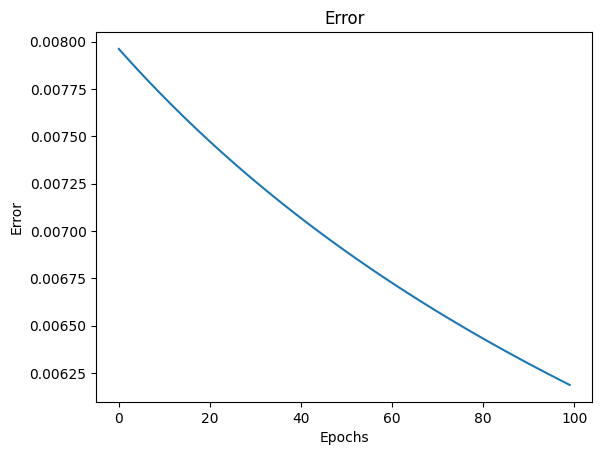

In [20]:
# Write your code here

X = np.array([
    [0,0],  # ==> 0
    [0,1],  # ==> 0
    [1,0],  # ==> 0
    [1,1]   # ==> 1
]).T
d = np.array([0,1,1,0]) # for AND

# inputSize = 2
# hiddenSize = 2
# outputSize = 1
lr = 0.01
epochs = 1000000

# w1 = np.random.rand(hiddenSize, inputSize) * 2 - 1
# b1 = np.random.rand(hiddenSize, 1) * 2 - 1
# w2 = np.random.rand(outputSize, hiddenSize) * 2 - 1
# b2 = np.random.rand(outputSize, 1) * 2 - 1

# training
error_list = []
for epoch in range(epochs):
    z1 = np.dot(w1, X) + b1
    a1 = 1 / (1 + np.exp(-z1))

    z2 = np.dot(w2, a1) + b2
    a2 = 1 / (1 + np.exp(-z2))

    error = d - a2
    da2 = error * (a2 * (1-a2))
    dz2 = da2

    da1 = np.dot(w2.T, dz2)
    dz1 = da1 * (a1 * (1- a1))

    w2 += lr * np.dot(dz2, a1.T)
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)

    w1 += lr * np.dot(dz1, X.T)
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))


# testing
z1 = np.dot(w1, X) + b1
a1 = 1 / ( 1 + np.exp(-z1))

z2 = np.dot(w2, a1) + b2
a2 = 1 / ( 1 + np.exp(-z2))

# Print results
print('\nFinal output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))

# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()


Double-click <b>here</b> for the solution.

<!-- Your answer is below:

lr = 0.01         # Learning rate
epochs = 1000000   # Number of training epochs


# Defining inputs and expected output (XOR truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 1, 1, 0])  # Expected output for XOR


# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))


# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('\nFinal output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))


# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()


-->


## Thank you for completing this lab!

This notebook was created by [Aman Aggarwal](https://www.linkedin.com/in/aggarwal-aman/). I hope you found this lab interesting and educational. Feel free to contact me if you have any questions!



<!--
## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2024-11-20  | 1.0  | Aman  |  Created the lab |
<hr>

## <h3 align="center"> © IBM Corporation. All rights reserved. <h3/>


## <h3 align="center"> &#169; IBM Corporation. All rights reserved. <h3/>
